# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found [here](./input_files/yocp_quickstart.yaml).


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess

In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_quickstart.yaml')

The above commands imported the required libraries and defined the file path to our input file. 

Let's now run the simulation

In [3]:
pre = PreProcess(input_file_name)
pre.setup(read_yaml=True)
pre.run()






 _______              __                
|     __|.---.-.----.|  |--.---.-.-----.
|__     ||  _  |   _||    <|  _  |__ --|
|_______||___._|__|  |__|__|___._|_____|
                                        


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Preprocessing                                  
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PreProcessing directory: 
SarkasSimulations/yocp_quickstart/PreProcessing

Equilibration dumps directory: 
SarkasSimulations/yocp_quickstart/PreProcessing/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_quickstart/PreProcessing/Production/dumps

Equilibration H5MD file: 
SarkasSimulations/yocp_quickstart/PreProcessing/Equilibration/dumps/yocp_quickstart_data.h5md
Pr

PP acceleration timer:   0%|          | 0/11 [00:00<?, ?it/s]

Time of PP acceleration calculation averaged over 10 steps:
0 min 0 sec 4 msec 740 usec 225 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Equilibration step averaged over 10 steps:
0 min 0 sec 5 msec 573 usec 488 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Production step averaged over 10 steps:
0 min 0 sec 5 msec 387 usec 102 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 0 min 55 sec

Production Time: 0 hrs 0 min 53 sec

Total Run Time: 0 hrs 1 min 49 sec


========================= Filesize Estimates =========================

Equilibration:
	H5MD filesize: 0 GB 77 MB 887 KB 259 bytes

Production:
	H5MD filesize: 0 GB 77 MB 887 KB 259 bytes

Total minimum required space: 0 GB 155 MB 750 KB 518 bytes


In [4]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()






 _______              __                
|     __|.---.-.----.|  |--.---.-.-----.
|__     ||  _  |   _||    <|  _  |__ --|
|_______||___._|__|  |__|__|___._|_____|
                                        


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
Simulation directory: 
SarkasSimulations/yocp_quickstart/Simulation

Equilibration dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Production/dumps

Equilibration H5MD file: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/dumps/yocp_quickstart_data.h5md
Production H5MD f

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 0 min 50 sec


------------------------------Production------------------------------ 



  0%|          | 0/10000 [00:00<?, ?it/s]


Production Time: 0 hrs 0 min 50 sec

Total Time: 0 hrs 1 min 40 sec


========================= Filesize Estimates =========================

Equilibration:
	H5MD filesize: 0 GB 71 MB 716 KB 72 bytes

Production:
	H5MD filesize: 0 GB 71 MB 716 KB 72 bytes

Total occupied space: 0 GB 143 MB 408 KB 144 bytes


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. 
The following lines which will initialize the `PostProcess` class and read the parameters of the simulation.

In [5]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PostProcessing directory: 
SarkasSimulations/yocp_quickstart/PostProcessing

Equilibration dumps directory:

Let's check the temperature and energy

In [6]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics, VelocityAutoCorrelationFunction

In [7]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.grab_sim_data()
# therm.temp_energy_plot(postproc)
therm.simulation_dataframe



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 1001
Total time per block: T = 5.0005e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period


,Time,Total Energy,Kinetic Energy,Potential Energy,Temperature
0,0.000000e+00,3.673257e-09,1.033196e-09,2.640062e-09,4988.937154
1,5.000000e-16,3.673257e-09,1.032145e-09,2.641112e-09,4983.865465
2,1.000000e-15,3.673258e-09,1.031039e-09,2.642219e-09,4978.522500
3,1.500000e-15,3.673257e-09,1.029890e-09,2.643368e-09,4972.973382
4,2.000000e-15,3.673256e-09,1.028709e-09,2.644547e-09,4967.272984
...,...,...,...,...,...
996,4.980000e-13,3.673249e-09,1.024975e-09,2.648274e-09,4949.244149
997,4.985000e-13,3.673249e-09,1.022983e-09,2.650266e-09,4939.623958
998,4.990000e-13,3.673249e-09,1.021140e-09,2.652109e-09,4930.725856
999,4.995000e-13,3.673250e-09,1.019487e-09,2.653763e-09,4922.744633


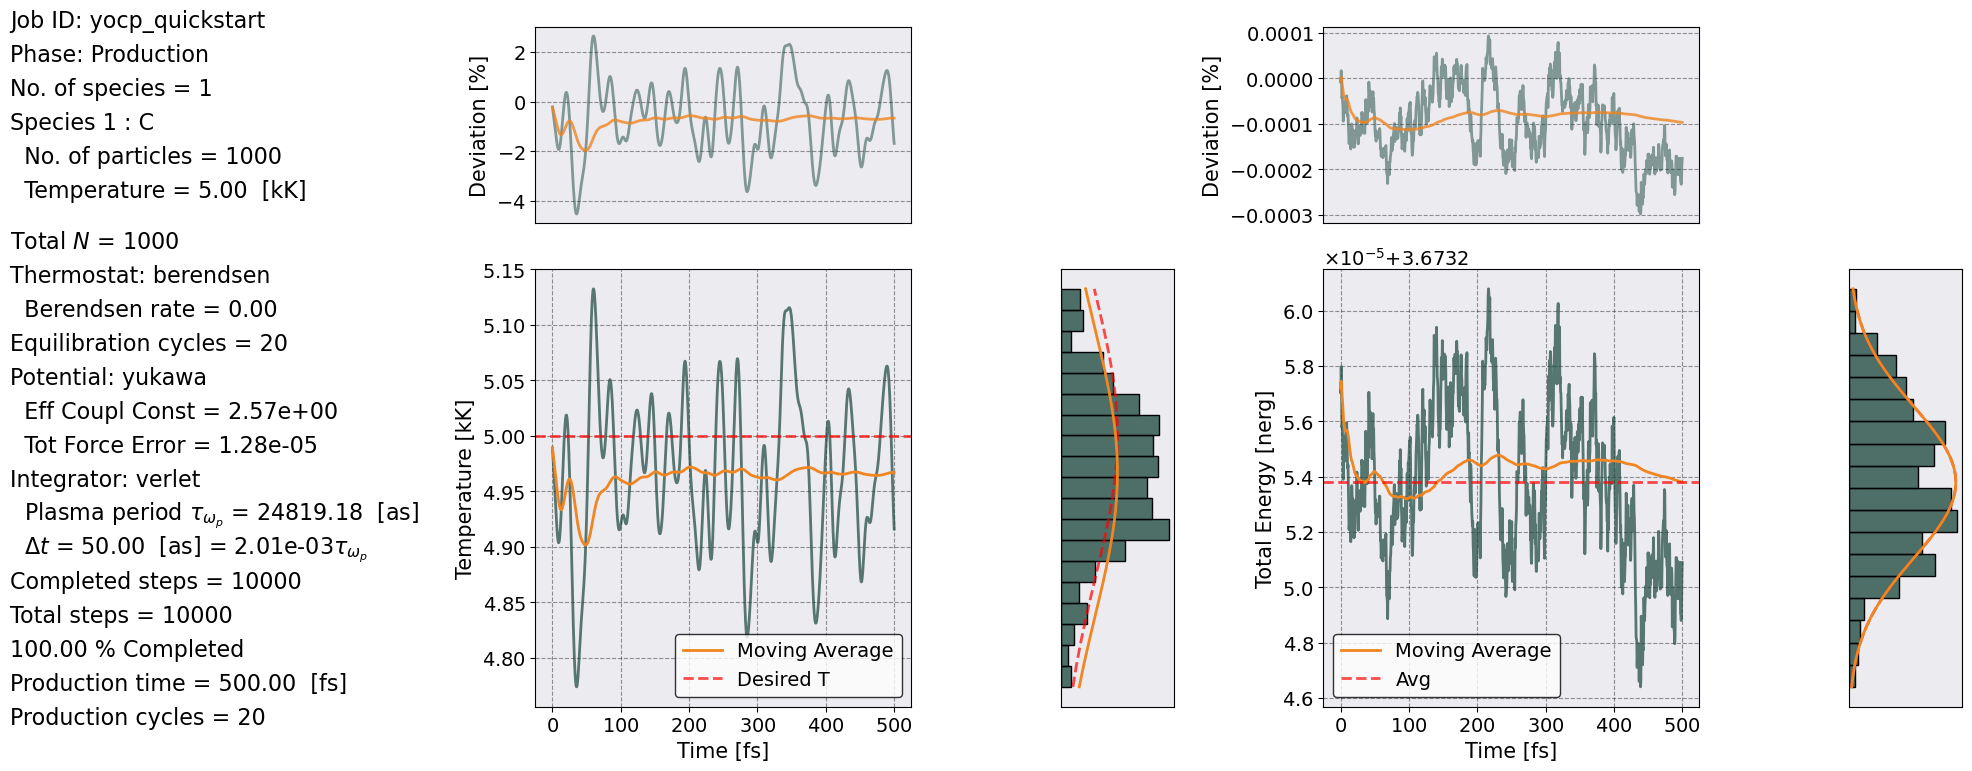

In [8]:
therm.temp_energy_plot(postproc)

Noice! The temperature (left plots) and total energy (plots on the right) are both conserved in the production phase. They do oscillate widly, but this is fine as long as the deviation percentages are within an accepted range. 

The deviation percentages (top plots) are calculated as

$$\Delta T(t) = \frac{T(t) - T_{\rm desired}}{T_{\rm desired}}, \quad \Delta E = \frac{E(t) - E(t = 0)}{E(t = 0)}. $$ 

___
## Observables

The most common observable is the radial distribution function, _i.e._ $g(r)$. This can be calculated using the following code.

In [9]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0187 a_ws = 2.4000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.6852 a_ws = 6.0000e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 1001
Total time per block: T = 5.0005e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]

first dump_end 1000

Radial Distribution Function Calculation Time: 0 sec 59 msec 252 usec 416 nsec


The RDF is computed and stored in a `pandas.DataFrame`. The columns `Mean` and `Std` refer to the subdivision of the simulation data. We will explain this in another notebook. For now let's make a plot.

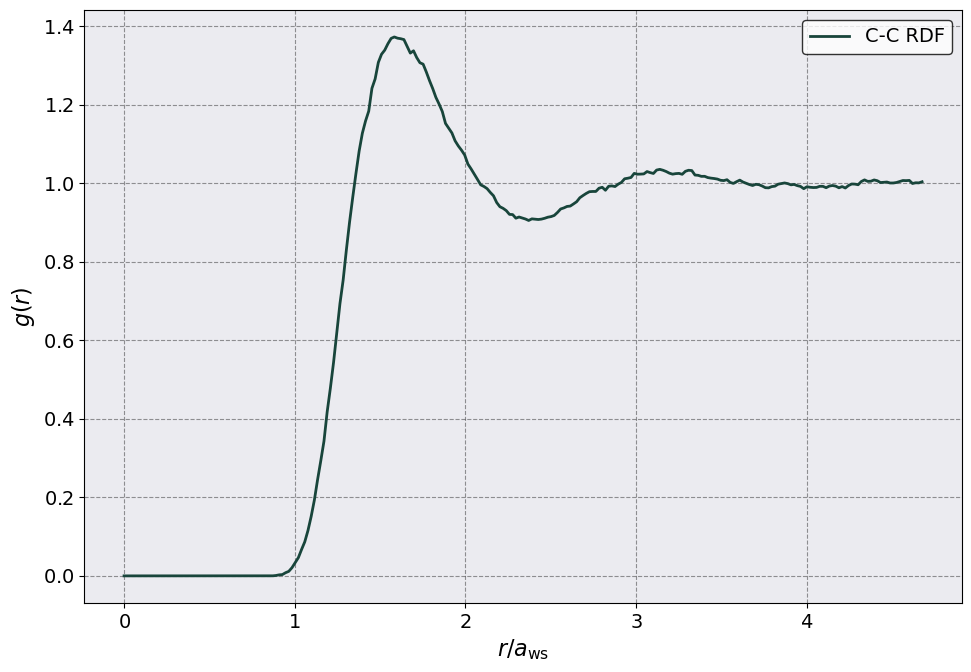

In [10]:
# Let's make a plot
ax = rdf.plot(
    scaling=rdf.a_ws,
    y = [("C-C RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$'
)
ax.legend(["C-C RDF"])

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.